<a href="https://colab.research.google.com/github/AnhVietPham/Deep-Learning/blob/main/DLTensorflow/probability/Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install d2l

     |████████████████████████████████| 83 kB 931 kB/s 


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from d2l import tensorflow as d2l

In [ ]:
fair_probs = tf.ones(6) / 6
tfp.distributions.Multinomial(1, fair_probs).sample()

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([0., 1., 0., 0., 0., 0.], dtype=float32)>

In [ ]:
tfp.distributions.Multinomial(10, fair_probs).sample()

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([4., 1., 3., 0., 1., 1.], dtype=float32)>

In [ ]:
counts = tfp.distributions.Multinomial(1000, fair_probs).sample()
counts/1000

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([0.152, 0.183, 0.149, 0.178, 0.164, 0.174], dtype=float32)>

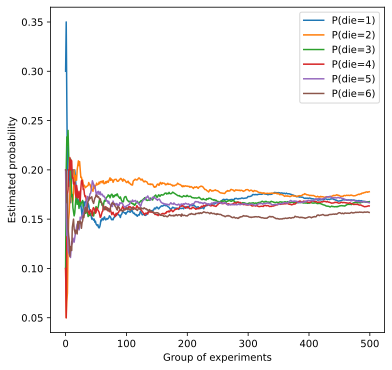

In [ ]:
counts = tfp.distributions.Multinomial(10, fair_probs).sample(500)
cum_counts = tf.cumsum(counts, axis = 0)
estimates = cum_counts / tf.reduce_sum(cum_counts, axis = 1, keepdims = True)

d2l.set_figsize((6,6))
for i in range(6):
  d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i+1)+")"))
  d2l.plt.gca().set_xlabel('Group of experiments')
  d2l.plt.gca().set_ylabel('Estimated probability')
  d2l.plt.legend()